In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Cust_Spend_Data.csv')

In [3]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [7]:
df_scaled=df.iloc[:,2:7]

In [8]:
df_scaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [9]:
from sklearn.preprocessing import scale as scale
scaled_RCDF=scale(df_scaled)

C:\Users\Uday\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [10]:
scaled_RCDF

array([[ 1.88649751, -1.24034735,  1.52752523, -0.74143264, -1.38013112],
       [ 0.78756692, -0.62017367, -0.65465367,  1.28065638,  1.7251639 ],
       [ 0.78756692,  1.86052102,  1.52752523, -0.29207953,  0.        ],
       [ 0.60441182,  0.62017367,  1.52752523, -0.74143264,  0.        ],
       [ 0.42125673,  1.24034735, -0.65465367,  1.7300095 , -0.34503278],
       [-0.31136367, -0.62017367, -0.65465367, -0.74143264,  1.38013112],
       [-0.86082896,  0.62017367, -0.65465367,  1.50533294, -0.69006556],
       [-0.86082896, -0.62017367, -0.65465367, -0.74143264, -1.03509834],
       [-1.04398406, -1.24034735, -0.65465367, -0.51675608, -0.69006556],
       [-1.41029426,  0.        , -0.65465367, -0.74143264,  1.03509834]])

In [11]:
scaled_RCDF1=df_scaled.apply(lambda x: (x-x.mean())/x.std())
scaled_RCDF1

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.789689,-1.176697,1.449138,-0.703385,-1.309307
1,0.747152,-0.588348,-0.621059,1.214937,1.636634
2,0.747152,1.765045,1.449138,-0.277091,0.000000
3,0.573395,0.588348,1.449138,-0.703385,0.000000
4,0.399639,1.176697,-0.621059,1.641231,-0.327327
5,-0.295386,-0.588348,-0.621059,-0.703385,1.309307
6,-0.816654,0.588348,-0.621059,1.428084,-0.654654
7,-0.816654,-0.588348,-0.621059,-0.703385,-0.981981
8,-0.990410,-1.176697,-0.621059,-0.490238,-0.654654
9,-1.337923,0.000000,-0.621059,-0.703385,0.981981


# Without Scaling

In [41]:
from scipy.spatial.distance import pdist,squareform
d_euc=pdist(df.iloc[:,2:7],metric='euclidean')

In [42]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
clus1=linkage(d_euc,method='average')

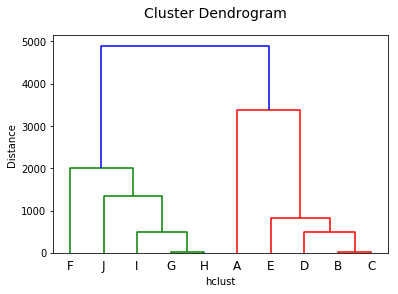

In [43]:
import matplotlib.pyplot as plt
dendrogram(clus1,labels=df.Name.values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram',fontsize=14);

In [34]:
d_euc1=pdist(scaled_RCDF1,metric='euclidean')

In [35]:
clus2=linkage(d_euc1,method='average')

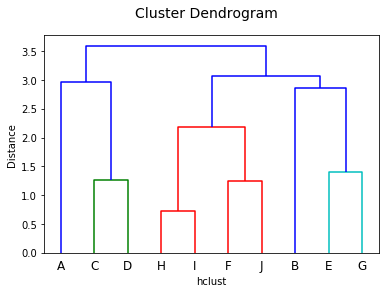

In [36]:
dendrogram(clus2,labels=df.Name.values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram',fontsize=14);